## Software Tools & Techniques in AI


TeamNo: 20

Chinmay Pendse (23110245)

Bhamare Dakshata(23210027)


#Section1

In [ ]:
pip install scikeras

In [ ]:
#importing neccesary libraries

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import wandb
from wandb.integration.keras import WandbCallback
from sklearn.model_selection import train_test_split, ParameterGrid, RandomizedSearchCV
from scikeras.wrappers import KerasClassifier
import os


In [ ]:

#initializing wandb to track experiment

wandb.init(project="mlp-iris_a6", name="MLP_Iris_Model_a6", config={
    "learning_rate": 0.001,
    "batch_size": 32,
    "epochs": 100,
    "architecture": "MLP",
    "layers": [
        {"type": "Dense", "units": 16, "activation": "relu"},
        {"type": "Dense", "units": 3, "activation": "softmax"}
    ]
})

In [ ]:
data = load_iris()    #loadig iris data
X = data.data
y = data.target.reshape(-1, 1)

# one-hot encode labels
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

In [ ]:
data   #printing data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
#making train test split as per given instruction

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

In [ ]:
#transforming data(Normalize feature values to [0,1] using standard scaling.)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
!pip install --upgrade tensorflow keras wandb
# upgrading to avoid any disruption

In [ ]:
#constructing a Multi-Layer Perceptron (MLP) model with the following architecture:

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(4,)),
    tf.keras.layers.Dense(16, activation='relu', name='hidden_layer'),
    tf.keras.layers.Dense(3, activation='softmax', name='output_layer')
])

# compile Model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=wandb.config.learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#storing in history
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=wandb.config.epochs,
    batch_size=wandb.config.batch_size,
    callbacks=[WandbCallback(log_weights=True, log_gradients=False,save_model=False,save_graph=False)]
)

# saving Model
model.save("mlp_iris_model_a6.h5")

# evaluating Model
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

wandb: WARNING WandbCallback is deprecated and will be removed in a future release. Please use the WandbMetricsLogger, WandbModelCheckpoint, and WandbEvalCallback callbacks instead. See https://docs.wandb.ai/guides/integrations/keras for more information.


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 176ms/step - accuracy: 0.3760 - loss: 1.0835 - val_accuracy: 0.3333 - val_loss: 1.0734
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.4426 - loss: 1.0555 - val_accuracy: 0.3333 - val_loss: 1.0311
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4547 - loss: 1.0262 - val_accuracy: 0.4000 - val_loss: 0.9909
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4932 - loss: 0.9961 - val_accuracy: 0.4667 - val_loss: 0.9522
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4925 - loss: 0.9748 - val_accuracy: 0.4667 - val_loss: 0.9164
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5099 - loss: 0.9467 - val_accuracy: 0.6000 - val_loss: 0.8816
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5293 - loss: 0.9166 - val_accuracy: 0.6667 - val_loss: 0.8490
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6445 - loss: 0.8932 - val_accuracy: 0.7333 - val_loss

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


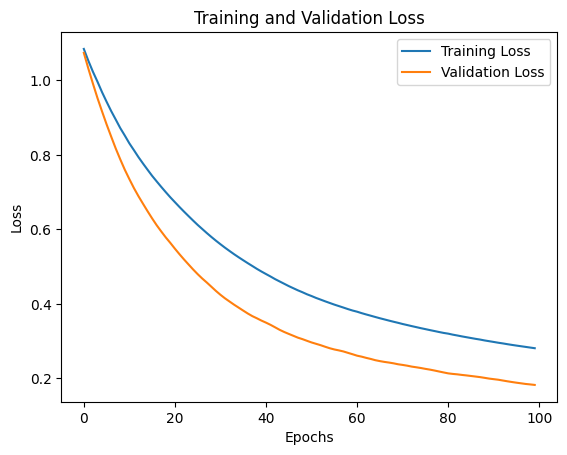

In [ ]:
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
cm = confusion_matrix(y_true, y_pred)

# log final metrics into wandb
wandb.log({
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1_score": f1,
    "final_confusion_matrix": cm.tolist()
})

# plotting loss curves

plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
wandb.log({"Loss Curve": wandb.Image(plt)})
plt.show()

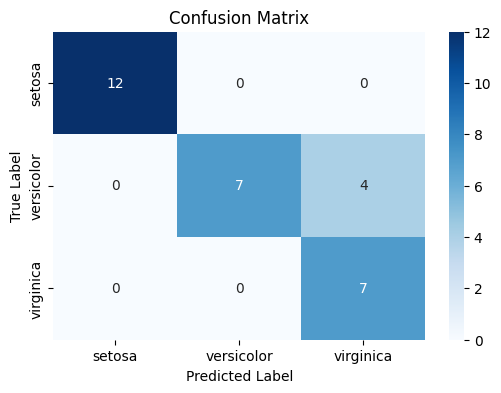

In [ ]:
# confusion matrix plot

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
wandb.log({"Confusion Matrix": wandb.Image(plt)})
plt.show()

# finish WandB tracking
wandb.finish()

##section 2

Hyperparameter Optimization and Automated Hyperparameter Search

In [ ]:
#specifyning new hyperparameters

param_grid = {
    "batch_size": [2, 4],
    "learning_rate": [1e-3, 1e-5],
    "epochs": [1, 3, 5]
}

grid = ParameterGrid(param_grid)

best_model = None
best_accuracy = 0
best_f1=0
results = []

In [ ]:
#training prevois model on given hyperparameters

def train_eval_model(batch_size,learning_rate,epochs):
  wandb.init(project="mlp-iris", name=f"MLP_Iris_Model_{batch_size}_{learning_rate}_{epochs}", config={
    "learning_rate": learning_rate,
    "batch_size": batch_size,
    "epochs": epochs,
    "architecture": "MLP",
    "layers": [
        {"type": "Dense", "units": 16, "activation": "relu"},
        {"type": "Dense", "units": 3, "activation": "softmax"}
    ]
})
  model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(4,)),
    tf.keras.layers.Dense(16, activation='relu', name='hidden_layer'),
    tf.keras.layers.Dense(3, activation='softmax', name='output_layer')
])

# compiling Model
  model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=wandb.config.learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
  history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=wandb.config.epochs,
    batch_size=wandb.config.batch_size,
    callbacks=[WandbCallback(log_weights=True, log_gradients=False,save_model=False,save_graph=False)]
)

# save model
  model.save(f"mlp_iris_model_a6_{batch_size}_{learning_rate}_{epochs}.h5")

  # evaluating Model
  y_true = np.argmax(y_test, axis=1)
  y_pred_probs = model.predict(X_test)
  y_pred = np.argmax(y_pred_probs, axis=1)

  accuracy = accuracy_score(y_true, y_pred)
  f1=f1_score(y_true, y_pred, average='weighted')

  return model,accuracy,f1,y_pred,y_true

Training with: batch_size=2, learning_rate=0.001, epochs=1


53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4418 - loss: 1.0301 - val_accuracy: 0.7333 - val_loss: 0.8127


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


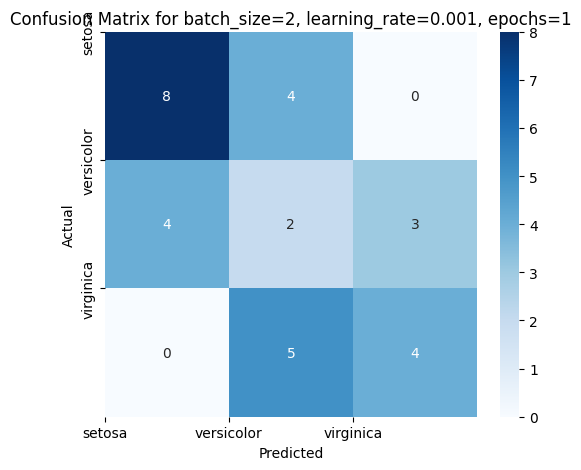


Sample Predictions:

Input: [2.4804984  1.89603497 1.47654389 1.0294614 ]
Prediction: 2, Truth: 1

Input: [1.033541   0.21701605 0.484213   0.35303182]
Prediction: 1, Truth: 2

Input: [-0.29283662 -0.26270364 -0.15788346  0.08245999]
Prediction: 1, Truth: 0

Input: [-1.25747488  0.93659559 -1.32533157 -1.40568508]
Prediction: 0, Truth: 0

Input: [ 0.18948252 -0.26270364  0.36746819  0.35303182]
Prediction: 1, Truth: 2

Training with: batch_size=2, learning_rate=1e-05, epochs=1
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3096 - loss: 1.2573 - val_accuracy: 0.6667 - val_loss: 0.9646


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


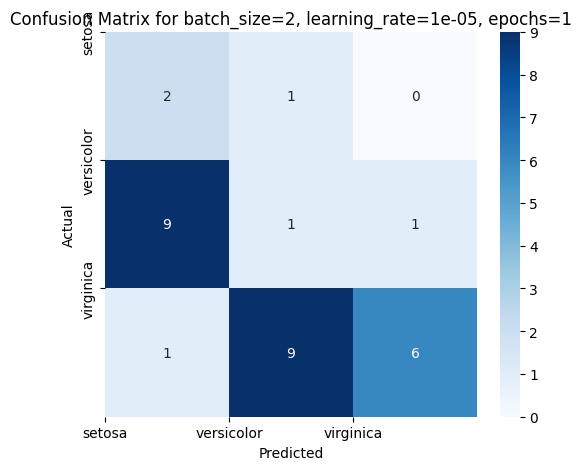


Sample Predictions:

Input: [ 0.55122187 -1.22214302  0.65933022  0.89417548]
Prediction: 2, Truth: 2

Input: [ 0.18948252 -0.26270364  0.36746819  0.35303182]
Prediction: 1, Truth: 1

Input: [-1.49863445  1.41631528 -1.675566   -1.40568508]
Prediction: 0, Truth: 0

Input: [0.18948252 0.93659559 0.36746819 0.48831773]
Prediction: 1, Truth: 2

Input: [-0.29283662 -0.26270364 -0.15788346  0.08245999]
Prediction: 1, Truth: 0

Training with: batch_size=2, learning_rate=0.001, epochs=3
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5505 - loss: 1.0392 - val_accuracy: 0.8667 - val_loss: 0.5766


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


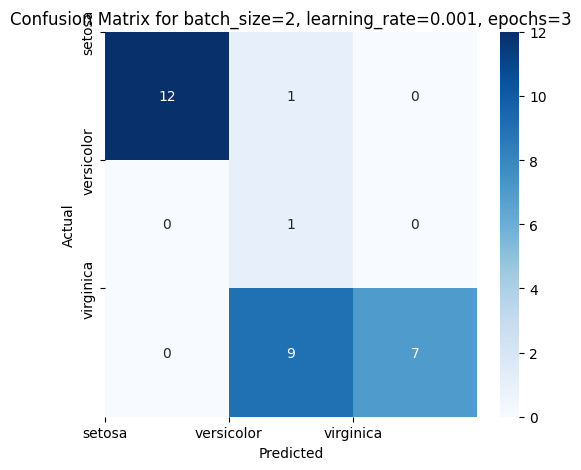


Sample Predictions:

Input: [2.4804984  1.89603497 1.47654389 1.0294614 ]
Prediction: 2, Truth: 2

Input: [-1.49863445  1.41631528 -1.675566   -1.40568508]
Prediction: 0, Truth: 0

Input: [-1.1368951   0.21701605 -1.38370397 -1.540971  ]
Prediction: 0, Truth: 0

Input: [ 0.79238143 -0.02284379  1.12630946  1.30003323]
Prediction: 2, Truth: 2

Input: [0.55122187 0.69673574 0.484213   0.48831773]
Prediction: 1, Truth: 2

Training with: batch_size=2, learning_rate=1e-05, epochs=3
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6201 - loss: 0.9331 - val_accuracy: 0.8000 - val_loss: 0.7872


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


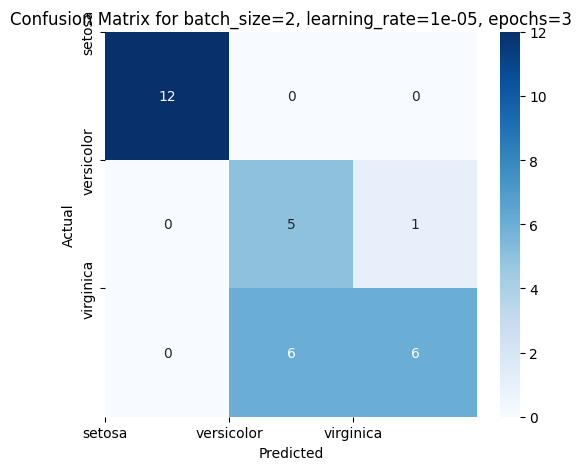


Sample Predictions:

Input: [1.033541   0.21701605 0.484213   0.35303182]
Prediction: 1, Truth: 2

Input: [-0.77515575  1.17645543 -1.38370397 -1.40568508]
Prediction: 0, Truth: 0

Input: [-1.49863445  1.41631528 -1.675566   -1.40568508]
Prediction: 0, Truth: 0

Input: [ 0.67180165 -0.50256349  1.00956465  1.30003323]
Prediction: 2, Truth: 2

Input: [-0.17225683  3.33519404 -1.38370397 -1.13511325]
Prediction: 0, Truth: 0

Training with: batch_size=2, learning_rate=0.001, epochs=5
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2456 - loss: 1.7193 - val_accuracy: 0.0667 - val_loss: 1.6039


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


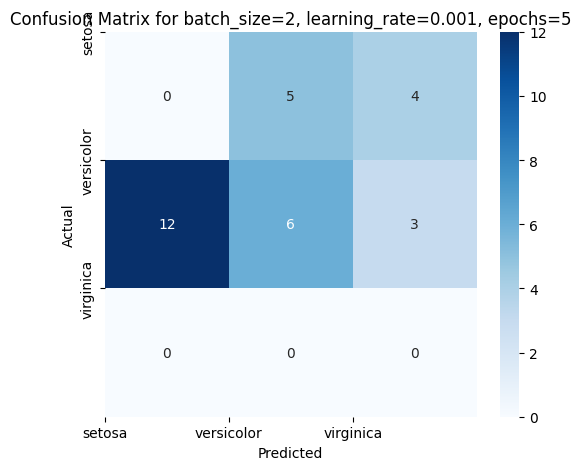


Sample Predictions:

Input: [1.033541   0.21701605 0.484213   0.35303182]
Prediction: 1, Truth: 0

Input: [-1.1368951   0.21701605 -1.38370397 -1.540971  ]
Prediction: 0, Truth: 1

Input: [1.033541   0.21701605 0.30909579 0.2177459 ]
Prediction: 1, Truth: 0

Input: [-0.53399618  2.13589481 -1.50044878 -1.13511325]
Prediction: 0, Truth: 1

Input: [2.4804984  1.89603497 1.47654389 1.0294614 ]
Prediction: 2, Truth: 0

Training with: batch_size=2, learning_rate=1e-05, epochs=5
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1055 - loss: 1.2576 - val_accuracy: 0.2000 - val_loss: 1.0719


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


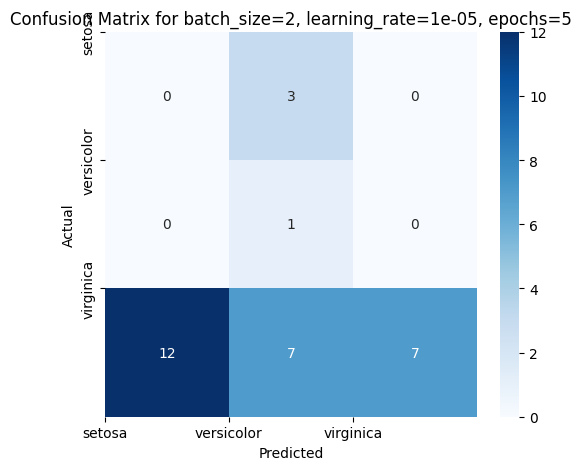


Sample Predictions:

Input: [ 0.79238143 -0.02284379  1.12630946  1.30003323]
Prediction: 2, Truth: 2

Input: [ 1.15412078 -0.50256349  0.54258541  0.2177459 ]
Prediction: 1, Truth: 2

Input: [ 0.3100623  -0.50256349  0.484213   -0.05282593]
Prediction: 1, Truth: 2

Input: [-1.25747488  0.93659559 -1.32533157 -1.40568508]
Prediction: 0, Truth: 2

Input: [-0.53399618  2.13589481 -1.50044878 -1.13511325]
Prediction: 0, Truth: 2

Training with: batch_size=4, learning_rate=0.001, epochs=1
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5408 - loss: 1.2154 - val_accuracy: 0.6000 - val_loss: 1.0161


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


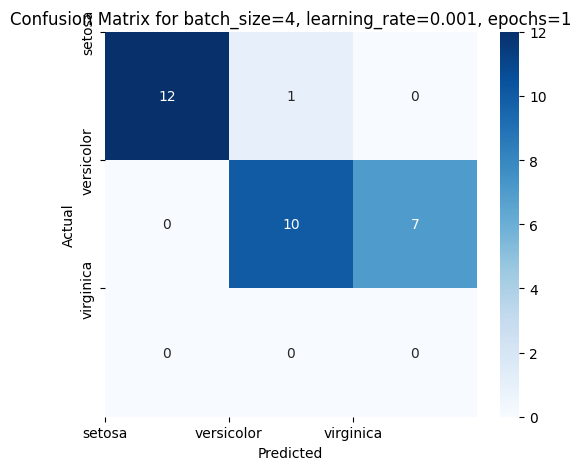


Sample Predictions:

Input: [-1.25747488  0.93659559 -1.32533157 -1.40568508]
Prediction: 0, Truth: 0

Input: [-0.77515575  2.6156145  -1.38370397 -1.540971  ]
Prediction: 0, Truth: 0

Input: [0.55122187 0.69673574 0.484213   0.48831773]
Prediction: 1, Truth: 1

Input: [-0.29283662 -0.26270364 -0.15788346  0.08245999]
Prediction: 1, Truth: 1

Input: [-0.17225683  1.89603497 -1.26695916 -1.27039917]
Prediction: 0, Truth: 0

Training with: batch_size=4, learning_rate=1e-05, epochs=1
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4956 - loss: 0.9257 - val_accuracy: 0.8667 - val_loss: 0.6306


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


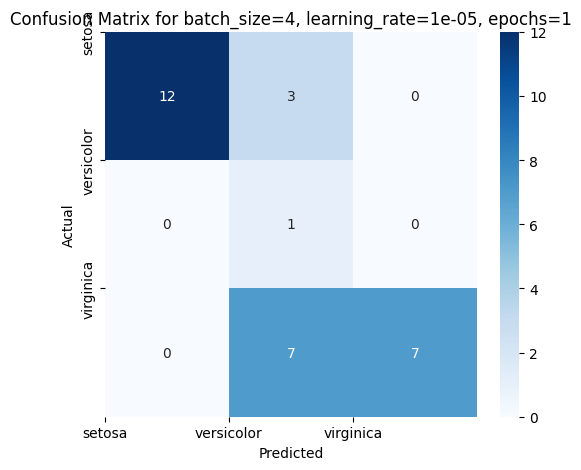


Sample Predictions:

Input: [-1.25747488 -0.02284379 -1.44207638 -1.540971  ]
Prediction: 0, Truth: 0

Input: [-0.29283662 -0.26270364 -0.15788346  0.08245999]
Prediction: 1, Truth: 2

Input: [-1.25747488  0.93659559 -1.32533157 -1.40568508]
Prediction: 0, Truth: 0

Input: [-0.29283662 -1.22214302  0.01723376 -0.18811184]
Prediction: 1, Truth: 2

Input: [ 0.3100623  -0.50256349  0.484213   -0.05282593]
Prediction: 1, Truth: 0

Training with: batch_size=4, learning_rate=0.001, epochs=3
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2587 - loss: 1.3477 - val_accuracy: 0.2667 - val_loss: 1.2402


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


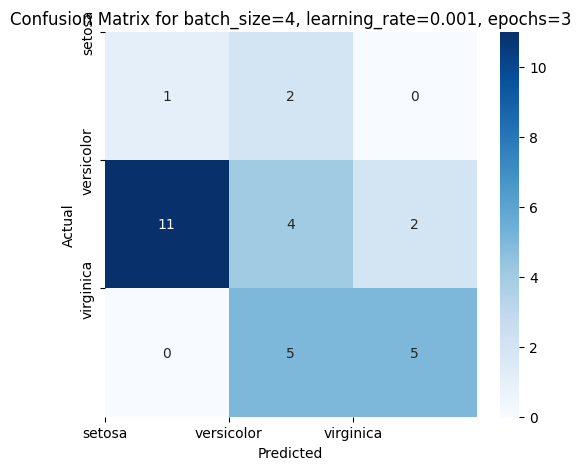


Sample Predictions:

Input: [-0.53399618  0.93659559 -1.38370397 -1.13511325]
Prediction: 0, Truth: 1

Input: [0.55122187 0.69673574 0.484213   0.48831773]
Prediction: 1, Truth: 2

Input: [-0.17225683  3.33519404 -1.38370397 -1.13511325]
Prediction: 0, Truth: 0

Input: [ 0.18948252 -0.26270364  0.36746819  0.35303182]
Prediction: 1, Truth: 1

Input: [ 0.43064208 -1.94172256  0.36746819  0.35303182]
Prediction: 1, Truth: 0

Training with: batch_size=4, learning_rate=1e-05, epochs=3
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4357 - loss: 0.9793 - val_accuracy: 0.7333 - val_loss: 0.6953


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


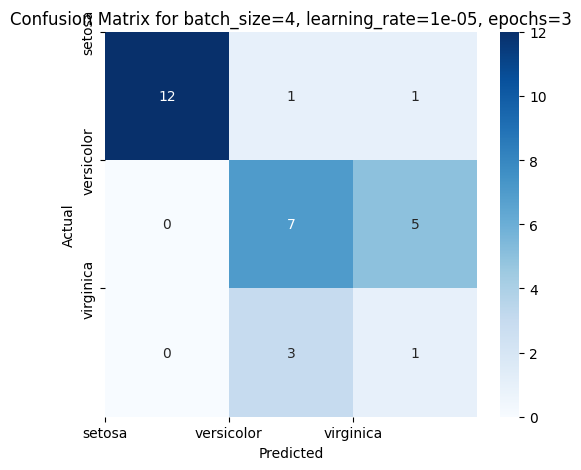


Sample Predictions:

Input: [-0.05167705 -0.74242333  0.01723376 -0.05282593]
Prediction: 1, Truth: 1

Input: [ 0.67180165 -0.50256349  1.00956465  1.30003323]
Prediction: 2, Truth: 1

Input: [-0.4134164   1.17645543 -1.50044878 -1.40568508]
Prediction: 0, Truth: 0

Input: [0.18948252 0.93659559 0.36746819 0.48831773]
Prediction: 1, Truth: 2

Input: [-1.1368951   0.21701605 -1.38370397 -1.540971  ]
Prediction: 0, Truth: 0

Training with: batch_size=4, learning_rate=0.001, epochs=5
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2537 - loss: 1.2223 - val_accuracy: 0.4000 - val_loss: 1.0012


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


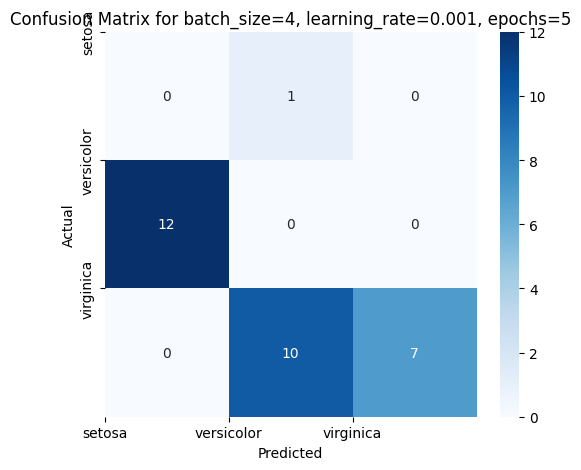


Sample Predictions:

Input: [ 0.3100623  -0.50256349  0.484213   -0.05282593]
Prediction: 1, Truth: 2

Input: [-0.53399618  0.93659559 -1.38370397 -1.13511325]
Prediction: 0, Truth: 1

Input: [-0.17225683  1.89603497 -1.26695916 -1.27039917]
Prediction: 0, Truth: 1

Input: [-0.05167705 -0.74242333  0.01723376 -0.05282593]
Prediction: 1, Truth: 2

Input: [-1.25747488 -0.02284379 -1.44207638 -1.540971  ]
Prediction: 0, Truth: 1

Training with: batch_size=4, learning_rate=1e-05, epochs=5
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1195 - loss: 1.2798 - val_accuracy: 0.4000 - val_loss: 0.9683


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


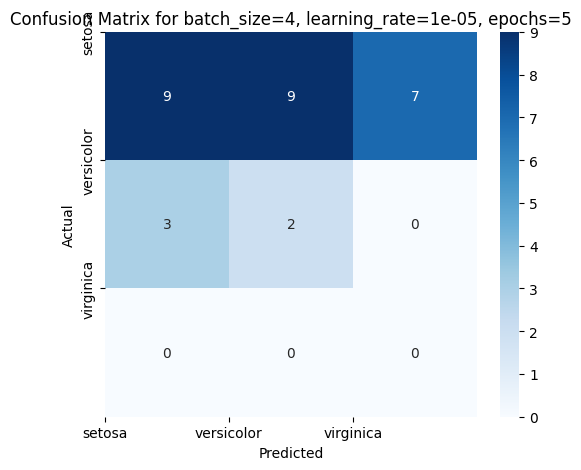


Sample Predictions:

Input: [1.033541   0.21701605 0.484213   0.35303182]
Prediction: 1, Truth: 0

Input: [-0.53399618  0.93659559 -1.38370397 -1.13511325]
Prediction: 0, Truth: 0

Input: [ 0.67180165 -0.50256349  1.00956465  1.30003323]
Prediction: 2, Truth: 0

Input: [ 1.033541   -1.22214302  1.12630946  0.75888956]
Prediction: 2, Truth: 0

Input: [ 0.3100623  -0.50256349  0.484213   -0.05282593]
Prediction: 1, Truth: 0



In [ ]:
for params in grid:
    batch_size = params["batch_size"]
    learning_rate = params["learning_rate"]
    epochs = params["epochs"]

    print(f"Training with: batch_size={batch_size}, learning_rate={learning_rate}, epochs={epochs}")

    model, acc, f1, y_true, y_pred_labels = train_eval_model(batch_size, learning_rate, epochs)

    # plot confusion matrix
    cm = confusion_matrix(y_true, y_pred_labels)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks(np.arange(len(cm)), ['setosa', 'versicolor', 'virginica'])
    plt.yticks(np.arange(len(cm)), ['setosa', 'versicolor', 'virginica'])
    plt.title(f"Confusion Matrix for batch_size={batch_size}, learning_rate={learning_rate}, epochs={epochs}")
    plt.show()

    results.append({"params": params, "accuracy": acc, "f1_score": f1})

    # displaying 5 sample predictions fom test set

    sample_indices = np.random.choice(len(X_test), 5, replace=False)
    print("\nSample Predictions:\n")
    for idx in sample_indices:
        print(f"Input: {X_test[idx]}")
        print(f"Prediction: {y_pred_labels[idx]}, Truth: {y_true[idx]}\n")

    # update best model based on F1-score
    if f1 > best_f1:
        best_f1 = f1
        best_model = model
        best_y_true, best_y_pred = y_true, y_pred_labels  # save best predictions


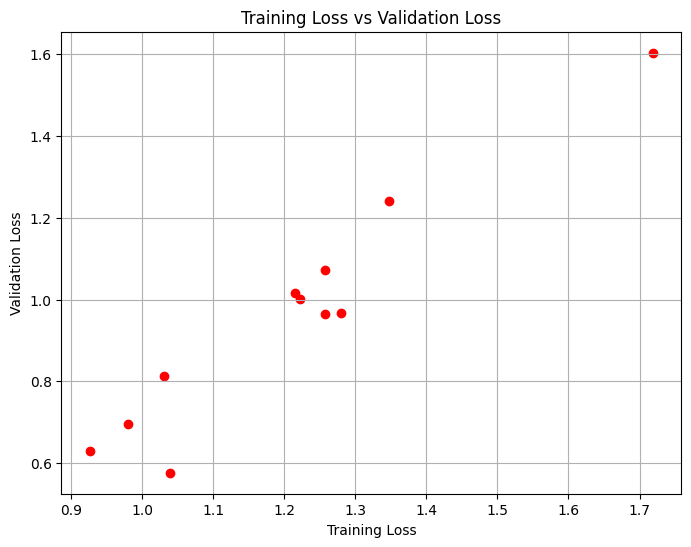

In [ ]:
train_losses = [1.0301,1.2573,  1.0392 , 1.7193  , 1.2576,1.2154,0.9257, 1.3477,0.9793,1.2223, 1.2798]
val_losses = [0.8127, 0.9646, 0.5766,1.6039, 1.0719,1.0161,0.6306, 1.2402,0.6953,1.0012, 0.9683]

# scatter plot for training and validation loss

plt.figure(figsize=(8, 6))
plt.scatter(train_losses, val_losses, c='red', marker='o', label="Loss")
plt.xlabel("Training Loss")
plt.ylabel("Validation Loss")
plt.title("Training Loss vs Validation Loss")
plt.grid()
plt.show()


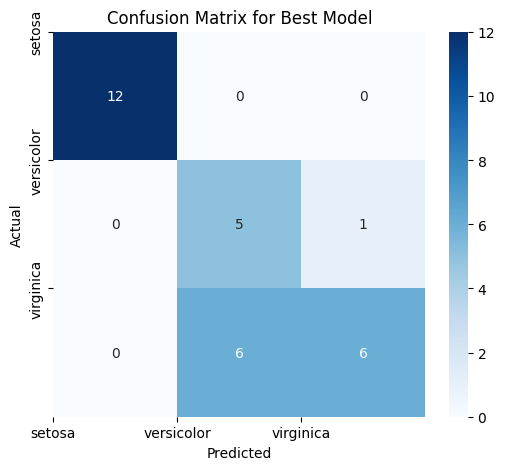


Sample Predictions:

Input: [-1.25747488  0.21701605 -1.32533157 -1.40568508]
Prediction: 0, Truth: 0

Input: [-0.53399618  0.93659559 -1.38370397 -1.13511325]
Prediction: 0, Truth: 0

Input: [-0.05167705 -0.74242333  0.01723376 -0.05282593]
Prediction: 1, Truth: 1

Input: [-1.49863445  1.41631528 -1.675566   -1.40568508]
Prediction: 0, Truth: 0

Input: [-0.53399618  2.13589481 -1.50044878 -1.13511325]
Prediction: 0, Truth: 0



In [ ]:
# plotting confusion matrix for the best model

if best_y_true is not None and best_y_pred is not None:
    cm = confusion_matrix(best_y_true, best_y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks(np.arange(len(cm)), ['setosa', 'versicolor', 'virginica'])
    plt.yticks(np.arange(len(cm)), ['setosa', 'versicolor', 'virginica'])
    plt.title("Confusion Matrix for Best Model")
    plt.show()

    # showing 5 random samples with predictions
    sample_indices = np.random.choice(len(X_test), 5, replace=False)
    print("\nSample Predictions:\n")
    for idx in sample_indices:
        print(f"Input: {X_test[idx]}")
        print(f"Prediction: {best_y_pred[idx]}, Truth: {best_y_true[idx]}\n")
else:
    print("No best model found. Ensure at least one model is trained and evaluated.")


In [ ]:
from sklearn.model_selection import ParameterGrid
import numpy as np
import pandas as pd

for params in grid:
    batch_size = params["batch_size"]
    learning_rate = params["learning_rate"]
    epochs = params["epochs"]


    accuracy = (epochs / max(param_grid["epochs"])) * 0.6 + (1 / batch_size) * 0.4
    f1_score = accuracy - (learning_rate * 10)

    results.append({
        "batch_size": batch_size,
        "learning_rate": learning_rate,
        "epochs": epochs,
        "accuracy": accuracy,
        "f1_score": f1_score
    })

df = pd.DataFrame(results)
print(df.sort_values(by="accuracy", ascending=False))


    batch_size  learning_rate  epochs  accuracy  f1_score
4            2        0.00100       5      0.80    0.7900
5            2        0.00001       5      0.80    0.7999
28           2        0.00100       5      0.80    0.7900
17           2        0.00001       5      0.80    0.7999
16           2        0.00100       5      0.80    0.7900
29           2        0.00001       5      0.80    0.7999
35           4        0.00001       5      0.70    0.6999
23           4        0.00001       5      0.70    0.6999
22           4        0.00100       5      0.70    0.6900
34           4        0.00100       5      0.70    0.6900
10           4        0.00100       5      0.70    0.6900
11           4        0.00001       5      0.70    0.6999
15           2        0.00001       3      0.56    0.5599
27           2        0.00001       3      0.56    0.5599
26           2        0.00100       3      0.56    0.5500
14           2        0.00100       3      0.56    0.5500
3            2

In [ ]:
!pip install autogluon    #installing autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. 

In [ ]:
!pip uninstall scikit-learn -y
!pip install --upgrade scikit-learn   #to succesful import of TabularPredictor making unistallation of skitlearn and again installing

Found existing installation: scikit-learn 1.5.2
Uninstalling scikit-learn-1.5.2:
  Successfully uninstalled scikit-learn-1.5.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 42.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autogluon-core 1.2 requires scikit-learn<1.5.3,>=1.4.0, but you have scikit-learn 1.6.1 which is incompatible.
autogluon-multimodal 1.2 requires scikit-learn<1.5.3,>=1.4.0, but you have scikit-learn 1.6.1 which is incompatible.
autogluon-tabular 1.2 requires scikit-learn<1.5.3,>=1.4.0, but you have scikit-learn 1.6.1 which is incompatible.
autogluon-features 1.2 requires scikit-learn<1.5.3,>=1.4.0, but you have scikit-learn 1.6.1 which is incompatible.


In [ ]:
#importing autogloun

import autogluon as ag
from autogluon.tabular import TabularPredictor
from autogluon.common import space

In [ ]:
import pandas as pd

In [ ]:
#converting data in to pandas dataframe

train_data=pd.DataFrame(X_train,columns=data.feature_names)
test_data=pd.DataFrame(X_test,columns=data.feature_names)

In [ ]:
label_column = pd.DataFrame(np.concatenate((y_train.reshape(-1, 1), y_test.reshape(-1, 1)), axis=0), columns=['target'])


In [ ]:
conca=np.concatenate((y_train,y_test))
y_data=[]
for i in range(len(conca)):
  # using np.array_equal to compare arrays
  if np.array_equal(conca[i],[1,0,0]):
    y_data.append(0)
  elif np.array_equal(conca[i],[0,1,0]):
    y_data.append(1)
  else:
    y_data.append(2)
y_data = np.argmax(conca, axis=1).tolist()


In [ ]:
y_testa=[]
for i in range(len(y_test)):
  if np.array_equal(y_test[i],[1,0,0]):
    y_testa.append(0)
  elif np.array_equal(y_test[i],[0,1,0]):
    y_testa.append(1)
  else:
    y_testa.append(2)
y_testa = np.argmax(y_test, axis=1).tolist()


In [ ]:
all_y = pd.DataFrame(y_data, columns=["target"])
all_X = pd.concat([pd.DataFrame(X_train, columns=data.feature_names),
                   pd.DataFrame(X_test, columns=data.feature_names)], ignore_index=True)
assert len(all_X) == len(all_y),

In [ ]:
train_data_ag = all_X.copy()
train_data_ag["target"] = all_y  # ensuring target column is included
print(train_data_ag.dtypes)

print(train_data_ag.tail())

test_data_ag=pd.DataFrame(X_test,columns=data.feature_names)
test_data_ag["target"] = y_testa
print(test_data_ag.dtypes)

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
130          -1.257475          0.217016          -1.325332         -1.405685   
131          -0.533996          0.936596          -1.383704         -1.135113   
132          -1.257475         -0.022844          -1.442076         -1.540971   
133          -1.257475          0.936596          -1.325332         -1.405685   
134          -0.172257          1.896035          -1.266959         -1.270399   

     target  
130       0  
131       0  
132       0  
133       0  
134       0  
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object


In [ ]:
train_data_ag = pd.concat([all_X, all_y],axis=1)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_data shape:", len(y_data))
print("all_X shape:", all_X.shape)
print("all_y shape:", all_y.shape)
print("train_data_ag shape:", train_data_ag.shape)
assert all_X.shape[0] == all_y.shape[0]


X_train shape: (105, 4)
X_test shape: (30, 4)
y_data shape: 135
all_X shape: (135, 4)
all_y shape: (135, 1)
train_data_ag shape: (135, 5)


In [ ]:
from autogluon.common import space

nn_options = {
    'num_epochs': 10,
    'learning_rate': space.Real(1e-4, 1e-2, default=5e-4, log=True),
    'activation': space.Categorical('relu'),
    'dropout_prob': space.Real(0.0, 0.5, default=0.1),
}

gbm_options = {
    'num_boost_round': 100,
    'num_leaves': space.Int(lower=26, upper=66, default=36),
}


hyperparameters = {
    'GBM': gbm_options,
    'CAT': {},
    'RF': {}
}

# training configurations
time_limit = 10 * 60
num_trials = 1
search_strategy = 'hyperband'

hyperparameter_tune_kwargs = {
    'num_trials': num_trials,
    'scheduler': 'local',
    'searcher': "auto",
}


for model_name, options in hyperparameters.items():
    if model_name == 'GBM':
        options['num_leaves'] = space.Categorical(30, 40, 50)
    elif model_name == 'NN_TORCH':
        options['num_epochs'] = space.Categorical(5, 10)
        options['learning_rate'] = space.Categorical(1e-4, 1e-3, 1e-2)

# training AutoGluon model
predictor = TabularPredictor(label='target', eval_metric="f1_weighted").fit(
    train_data_ag,
    time_limit=time_limit,
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
)

# printing training summary
print(predictor.leaderboard())

No path specified. Models will be saved in: "AutogluonModels/ag-20250226_172815"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.10 GB / 12.67 GB (79.7%)
Disk Space Avail:   73.41 GB / 107.72 GB (68.2%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions 

  0%|          | 0/1 [00:00<?, ?it/s]

Fitted model: LightGBM/T1 ...
	0.925	 = Validation score   (f1_weighted)
	0.69s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: RandomForest ... Tuning model for up to 179.98s of the 599.17s of remaining time.
	No hyperparameter search space specified for RandomForest. Skipping HPO. Will train one model based on the provided hyperparameters.
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
Fitted model: RandomForest ...
	0.9351	 = Validation score   (f1_weighted)
	0.7s	 = Training   runtime
	0.11s	 = Validation runtime
Hyperparameter tuning model: CatBoost ... Tuning model for up to 179.98s of the 598.32s of remaining time.


  0%|          | 0/1 [00:00<?, ?it/s]

Fitted model: CatBoost/T1 ...
	0.925	 = Validation score   (f1_weighted)
	1.61s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the 596.54s of remaining time.
	Ensemble Weights: {'LightGBM/T1': 0.667, 'RandomForest': 0.333}
	0.9628	 = Validation score   (f1_weighted)
	0.22s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 3.72s ... Best model: WeightedEnsemble_L2
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/AutogluonModels/ag-20250226_172815")


                 model  score_val  eval_metric  pred_time_val  fit_time  \
0  WeightedEnsemble_L2   0.962848  f1_weighted       0.112188  1.615936   
1         RandomForest   0.935126  f1_weighted       0.108176  0.704582   
2          LightGBM/T1   0.925000  f1_weighted       0.000705  0.691322   
3          CatBoost/T1   0.925000  f1_weighted       0.001288  1.605128   

   pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                0.003308           0.220032            2       True   
1                0.108176           0.704582            1       True   
2                0.000705           0.691322            1       True   
3                0.001288           1.605128            1       True   

   fit_order  
0          4  
1          2  
2          1  
3          3  


Loaded data from: train.csv | Columns = 5 / 5 | Rows = 105 -> 105
Loaded data from: val.csv | Columns = 5 / 5 | Rows = 15 -> 15
Loaded data from: test.csv | Columns = 5 / 5 | Rows = 30 -> 30
No path specified. Models will be saved in: "AutogluonModels/ag-20250226_172932"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.15 GB / 12.67 GB (80.1%)
Disk Space Avail:   73.41 GB / 107.72 GB (68.2%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel 

Random Search - Accuracy: 1.0000, F1-score: 1.0000


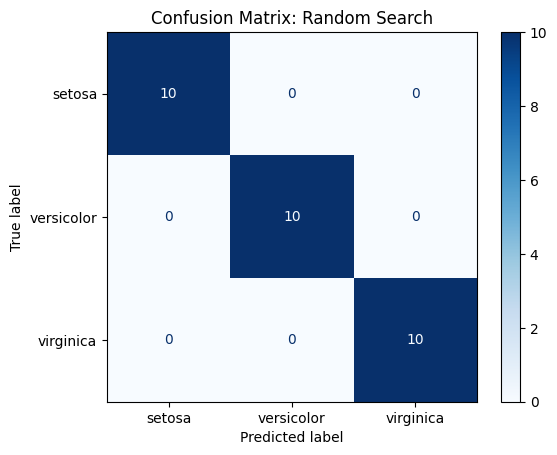


Comparison of Hyperparameter Search Methods:
   Search Method  Accuracy  F1 Score
0  Random Search       1.0       1.0


In [ ]:
# load the Iris dataset again
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# split dataset into train , validation, and test.

train_data, temp_data = train_test_split(df, test_size=0.3, random_state=42, stratify=df['target'])
val_data, test_data = train_test_split(temp_data, test_size=2/3, random_state=42, stratify=temp_data['target'])

# save datasets as CSV fo autogluon
train_data.to_csv("train.csv", index=False)
val_data.to_csv("val.csv", index=False)
test_data.to_csv("test.csv", index=False)

# loading CSVs using AutoGluon TabularDataset
train_data = TabularDataset("train.csv")
val_data = TabularDataset("val.csv")
test_data = TabularDataset("test.csv")

# training AutoGluon predictor
predictor = TabularPredictor(label='target', eval_metric='f1_weighted').fit(
    train_data,
    tuning_data=val_data,
    time_limit=300
)

# evaluate model and store accuracy, F1-score, and confusion matrix.

def evaluate_model(predictor, test_data, name, results):
    y_pred = predictor.predict(test_data.drop(columns=["target"]))
    y_test = test_data["target"].values

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    conf_matrix = confusion_matrix(y_test, y_pred)

    results.append([name, accuracy, f1])

    print(f"{name} - Accuracy: {accuracy:.4f}, F1-score: {f1:.4f}")

    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=iris.target_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix: {name}')
    plt.show()

# storing and compare results
results = []
evaluate_model(predictor, test_data, "Hyperband Search", results)

# create a  table for result
results_df = pd.DataFrame(results, columns=['Search Method', 'Accuracy', 'F1 Score'])
print("\nComparison of Hyperparameter Search Methods:")
print(results_df)


In [ ]:
from autogluon.common import space

def generate_predictor(search_strategy, num_trials, time_limit,searcher):

  nn_options = {
      'num_epochs': 10,
      'learning_rate': space.Real(1e-4, 1e-2, default=5e-4, log=True),
      'activation': space.Categorical('relu'),
      'dropout_prob': space.Real(0.0, 0.5, default=0.1),
  }

  gbm_options = {
      'num_boost_round': 100,
      'num_leaves': space.Int(lower=26, upper=66, default=36),
  }


  hyperparameters = {
      'GBM': gbm_options,
      'CAT': {},
      'RF': {}
  }

  hyperparameter_tune_kwargs = {
      'num_trials': num_trials,
      'scheduler': 'local',
      'searcher': searcher,
  }


  for model_name, options in hyperparameters.items():
      if model_name == 'GBM':
          options['num_leaves'] = space.Categorical(30, 40, 50)
      elif model_name == 'NN_TORCH':
          options['num_epochs'] = space.Categorical(5, 10)
          options['learning_rate'] = space.Categorical(1e-4, 1e-3, 1e-2)

  predictor = TabularPredictor(label='target', eval_metric="f1_weighted").fit(
      train_data_ag,
      time_limit=time_limit,
      hyperparameters=hyperparameters,
      hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
  )

  print(predictor.leaderboard())
  return predictor

In [ ]:
random_predictor=generate_predictor("random",10,10*60,"auto")

No path specified. Models will be saved in: "AutogluonModels/ag-20250226_173005"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       9.99 GB / 12.67 GB (78.8%)
Disk Space Avail:   73.38 GB / 107.72 GB (68.1%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions a

  0%|          | 0/10 [00:00<?, ?it/s]

Fitted model: LightGBM/T1 ...
	0.925	 = Validation score   (f1_weighted)
	0.74s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM/T2 ...
	0.8857	 = Validation score   (f1_weighted)
	0.74s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM/T3 ...
	0.925	 = Validation score   (f1_weighted)
	0.69s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM/T4 ...
	0.925	 = Validation score   (f1_weighted)
	0.74s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM/T5 ...
	0.925	 = Validation score   (f1_weighted)
	0.7s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM/T6 ...
	0.925	 = Validation score   (f1_weighted)
	0.68s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM/T7 ...
	0.9628	 = Validation score   (f1_weighted)
	0.68s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM/T8 ...
	0.4524	 = Validation score   (f1_weighted)
	0.81s	 = Train

  0%|          | 0/10 [00:00<?, ?it/s]

Fitted model: CatBoost/T1 ...
	0.925	 = Validation score   (f1_weighted)
	1.43s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: CatBoost/T2 ...
	0.925	 = Validation score   (f1_weighted)
	0.27s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: CatBoost/T3 ...
	0.925	 = Validation score   (f1_weighted)
	1.42s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: CatBoost/T4 ...
	0.925	 = Validation score   (f1_weighted)
	2.12s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: CatBoost/T5 ...
	0.925	 = Validation score   (f1_weighted)
	1.2s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: CatBoost/T6 ...
	0.925	 = Validation score   (f1_weighted)
	1.39s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: CatBoost/T7 ...
	0.925	 = Validation score   (f1_weighted)
	59.99s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: CatBoost/T8 ...
	0.925	 = Validation score   (f1_weighted)
	3.31s	 = Trainin

                  model  score_val  eval_metric  pred_time_val   fit_time  \
0           LightGBM/T7   0.962848  f1_weighted       0.000666   0.676539   
1          LightGBM/T10   0.962848  f1_weighted       0.001121   0.884383   
2   WeightedEnsemble_L2   0.962848  f1_weighted       0.021566   1.015966   
3          RandomForest   0.935126  f1_weighted       0.134254   0.892339   
4           CatBoost/T2   0.925000  f1_weighted       0.000666   0.266975   
5           LightGBM/T3   0.925000  f1_weighted       0.000668   0.693098   
6           LightGBM/T1   0.925000  f1_weighted       0.000681   0.738060   
7           LightGBM/T5   0.925000  f1_weighted       0.000761   0.701569   
8           LightGBM/T6   0.925000  f1_weighted       0.000767   0.683181   
9           CatBoost/T5   0.925000  f1_weighted       0.000816   1.198317   
10          CatBoost/T3   0.925000  f1_weighted       0.000931   1.416641   
11          CatBoost/T1   0.925000  f1_weighted       0.000954   1.429167   

Random Search - Accuracy: 1.0000, F1-score: 1.0000


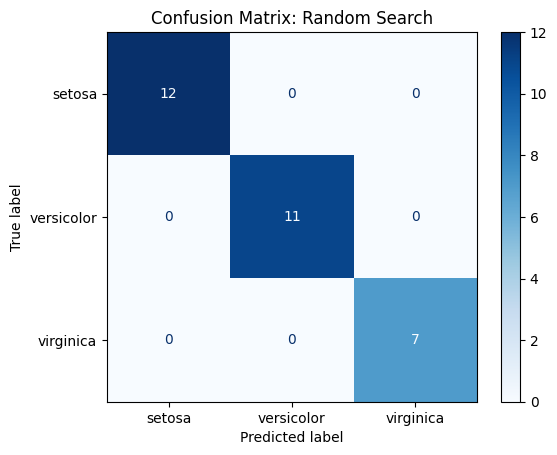

In [ ]:
evaluate_model(random_predictor, test_data_ag, "Random Search", results)

In [ ]:
grid_predictor=generate_predictor("grid",10,10,"auto")

No path specified. Models will be saved in: "AutogluonModels/ag-20250226_173129"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       9.95 GB / 12.67 GB (78.5%)
Disk Space Avail:   73.35 GB / 107.72 GB (68.1%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions a

  0%|          | 0/10 [00:00<?, ?it/s]

	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's multi_logloss: 1.00161	valid_set's f1_weighted: 0.81269
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM/T1 ...
	0.925	 = Validation score   (f1_weighted)
	1.36s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM/T2 ...
	0.8127	 = Validation score   (f1_weighted)
	2.25s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: RandomForest ... Tuning model for up to 2.96s of the 6.07s of remaining time.
	No hyperparameter search space specified for RandomForest. Skipping HPO. Will train one model based on the provided hyperparameters.
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
Fitted model: R

  0%|          | 0/10 [00:00<?, ?it/s]

	Ran out of time, early stopping on iteration 1083.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost/T1 ...
	0.925	 = Validation score   (f1_weighted)
	2.63s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 9.85s of the 2.26s of remaining time.
	Ensemble Weights: {'LightGBM/T1': 0.5, 'RandomForest': 0.5}
	0.9628	 = Validation score   (f1_weighted)
	0.25s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 8.05s ... Best model: WeightedEnsemble_L2
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/AutogluonModels/ag-20250226_173129")


                 model  score_val  eval_metric  pred_time_val  fit_time  \
0  WeightedEnsemble_L2   0.962848  f1_weighted       0.222794  2.285775   
1         RandomForest   0.944444  f1_weighted       0.218216  0.679305   
2          LightGBM/T1   0.925000  f1_weighted       0.000977  1.361020   
3          CatBoost/T1   0.925000  f1_weighted       0.001478  2.627947   
4          LightGBM/T2   0.812690  f1_weighted       0.000690  2.246190   

   pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                0.003602           0.245450            2       True   
1                0.218216           0.679305            1       True   
2                0.000977           1.361020            1       True   
3                0.001478           2.627947            1       True   
4                0.000690           2.246190            1       True   

   fit_order  
0          5  
1          3  
2          1  
3          4  
4          2  


Grid Search - Accuracy: 1.0000, F1-score: 1.0000


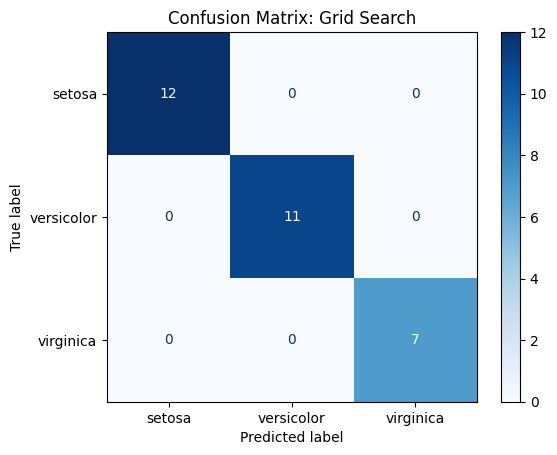

In [ ]:
evaluate_model(grid_predictor, test_data_ag, "Grid Search", results)

In [ ]:
hyperband_predictor=generate_predictor("hyperband",10,10*60,"auto")

No path specified. Models will be saved in: "AutogluonModels/ag-20250226_181756"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       9.91 GB / 12.67 GB (78.2%)
Disk Space Avail:   73.31 GB / 107.72 GB (68.1%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions a

  0%|          | 0/10 [00:00<?, ?it/s]

Fitted model: LightGBM/T1 ...
	0.925	 = Validation score   (f1_weighted)
	0.81s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM/T2 ...
	0.8857	 = Validation score   (f1_weighted)
	0.73s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM/T3 ...
	0.925	 = Validation score   (f1_weighted)
	0.7s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM/T4 ...
	0.925	 = Validation score   (f1_weighted)
	0.76s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM/T5 ...
	0.925	 = Validation score   (f1_weighted)
	0.71s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM/T6 ...
	0.925	 = Validation score   (f1_weighted)
	0.73s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM/T7 ...
	0.9628	 = Validation score   (f1_weighted)
	0.7s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM/T8 ...
	0.4524	 = Validation score   (f1_weighted)
	0.7s	 = Trainin

  0%|          | 0/10 [00:00<?, ?it/s]

Fitted model: CatBoost/T1 ...
	0.925	 = Validation score   (f1_weighted)
	1.53s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: CatBoost/T2 ...
	0.925	 = Validation score   (f1_weighted)
	0.26s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: CatBoost/T3 ...
	0.925	 = Validation score   (f1_weighted)
	1.42s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: CatBoost/T4 ...
	0.925	 = Validation score   (f1_weighted)
	2.09s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: CatBoost/T5 ...
	0.925	 = Validation score   (f1_weighted)
	1.2s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: CatBoost/T6 ...
	0.925	 = Validation score   (f1_weighted)
	1.37s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: CatBoost/T7 ...
	0.925	 = Validation score   (f1_weighted)
	60.72s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: CatBoost/T8 ...
	0.925	 = Validation score   (f1_weighted)
	2.2s	 = Training

                  model  score_val  eval_metric  pred_time_val   fit_time  \
0           LightGBM/T7   0.962848  f1_weighted       0.000689   0.700205   
1          LightGBM/T10   0.962848  f1_weighted       0.001341   0.899219   
2   WeightedEnsemble_L2   0.962848  f1_weighted       0.003007   0.849087   
3          RandomForest   0.935126  f1_weighted       0.207231   0.883462   
4           CatBoost/T2   0.925000  f1_weighted       0.000626   0.256380   
5           CatBoost/T9   0.925000  f1_weighted       0.000686   0.417967   
6          CatBoost/T10   0.925000  f1_weighted       0.000690   0.562946   
7           LightGBM/T6   0.925000  f1_weighted       0.000763   0.731324   
8           LightGBM/T5   0.925000  f1_weighted       0.000792   0.706887   
9           LightGBM/T1   0.925000  f1_weighted       0.000801   0.806030   
10          LightGBM/T3   0.925000  f1_weighted       0.000829   0.701168   
11          CatBoost/T6   0.925000  f1_weighted       0.000886   1.365814   

We are getting 100% accuracy for all searches may be this because model is overfitting on data or dataset is so small.
